In [1]:
#Solution using sklearn
#See guide on DataCamp: https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
#See guide on towardsdatascience: https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75

#Import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [2]:
#Import data

#Matt path
loan = pd.read_csv('C:\\Users\\mattd\\Desktop\\KNN\\small_loan_10k.csv')

#Ian path
#loan = pd.read_csv('~/Documents/MBA/MachineLearning/loan.csv')

#Test big loan
#loan = pd.read_csv('C:\\Users\\mattd\\Desktop\\KNN\\loan.csv')


In [3]:
#Clean data
#change loan to specific column
loan_s = loan[['annual_inc', 'loan_amnt', 'open_acc', 'purpose', 'dti', 'pub_rec', 'home_ownership', 'inq_last_6mths', 'grade']]

#Delete annual_inc = 0
loan_s = loan_s[loan_s.annual_inc != 0]

#Delete annual_inc > 500000
loan_s = loan_s[loan_s.annual_inc <= 500000]

#Delete open acc > 60
loan_s = loan_s[loan_s.open_acc <= 60]

#Delete dti > 60
loan_s = loan_s[loan_s.dti <= 60]

#Delete pub rec > 5
loan_s = loan_s[loan_s.pub_rec <= 5]

#Delete inq_last_6mths > 5
loan_s = loan_s[loan_s.inq_last_6mths <= 5]

#Replace Home Ownership values ANY and NONE with OTHER
loan_s = loan_s.replace(to_replace = ["ANY","NONE"], value = "OTHER")

#Replace Purpose values house, car, vacation, renewable energy, wedding, and educational with other
loan_s = loan_s.replace(to_replace = ["house","car","vacation","renewable_energy","wedding","educational"], value = "other")

#Drop NAs
loan_s.dropna(inplace = True)

In [4]:
#defining the data sets
y = loan_s['grade']
loan_s = loan_s.drop(columns=['grade'])


In [5]:
#dummy variables for purpose, home ownership, and grade
#dummygrade = pd.get_dummies(loan['grade'])
dummypurp = pd.get_dummies(loan_s['purpose'])
dummyhome = pd.get_dummies(loan_s['home_ownership'])
#Concat 
#loan_s = pd.concat([loan_s, dummypurp, dummyhome, dummygrade], axis=1)
loan_s = pd.concat([loan_s, dummypurp, dummyhome], axis=1)

#drop
#loan_s = loan_s.drop(['grade','purpose','home_ownership'], axis=1)
loan_s = loan_s.drop(['purpose','home_ownership'], axis=1)

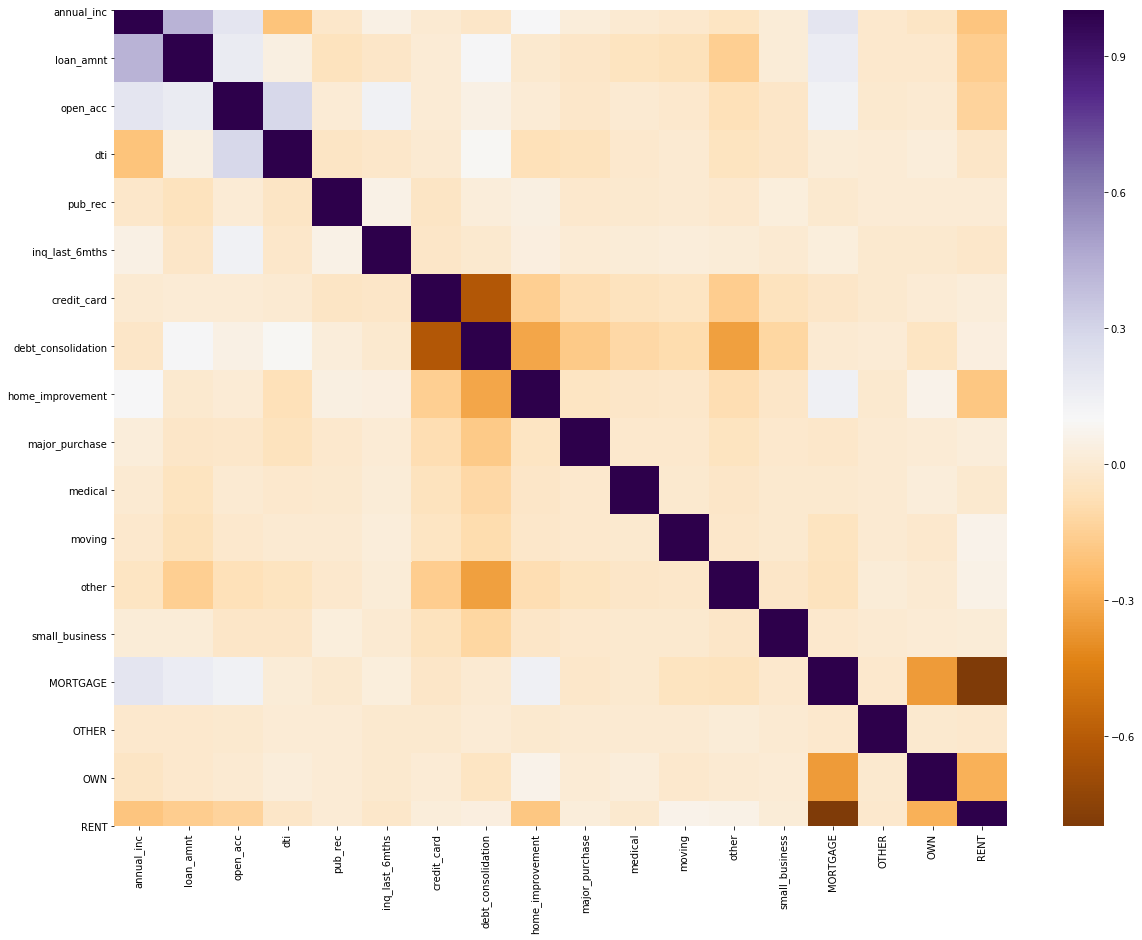

In [6]:
#See: https://python-graph-gallery.com/90-heatmaps-with-various-input-format/
#Calculate correlation between each pair of variables
corr_matrix = loan_s.corr()

#Plot it
plt.subplots(figsize = (20,15))
sns.heatmap(corr_matrix, cmap = 'PuOr')

In [7]:
#Normalization



float_array = loan_s.values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
loan_s = pd.DataFrame(scaled_array)


print(loan_s)

             0         1     2         3    4    5    6    7    8    9   10  \
0     0.093776  0.231063  0.30  0.249662  0.4  0.0  0.0  1.0  0.0  0.0  0.0   
1     0.130350  0.363463  0.10  0.273295  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
2     0.172834  0.363463  0.18  0.136226  0.0  0.4  0.0  1.0  0.0  0.0  0.0   
3     0.207562  0.439847  0.36  0.649392  0.0  0.2  0.0  1.0  0.0  0.0  0.0   
4     0.154952  0.363463  0.28  0.408170  0.0  0.2  0.0  1.0  0.0  0.0  0.0   
...        ...       ...   ...       ...  ...  ...  ...  ...  ...  ...  ...   
9936  0.147964  0.236155  0.12  0.116813  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
9937  0.095808  0.225971  0.26  0.196658  0.2  0.0  1.0  0.0  0.0  0.0  0.0   
9938  0.146605  0.287078  0.24  0.533930  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
9939  0.051919  0.287078  0.06  0.208643  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
9940  0.113688  0.464036  0.24  0.477718  0.0  0.0  0.0  1.0  0.0  0.0  0.0   

       11   12   13   14   15   16   17  
0     0.0

In [9]:
#Split into training and test sets

#need to split data set between dependent and independent

x_train, x_test, y_train, y_test = train_test_split(loan_s, y, test_size=0.3)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(6958, 18) (6958,)
(2983, 18) (2983,)


In [10]:
#Specify number of neighbors
knn_11 = KNeighborsClassifier(n_neighbors = 11)

In [11]:
#Train model with test set
knn_11.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [12]:
#Predict output with test set
y_pred_11 = knn_11.predict(x_test)

In [13]:
#Model Accuracy
from sklearn import metrics
Accuracy_11 = metrics.accuracy_score(y_test, y_pred_11)
print("Accuracy_11:",Accuracy_11)

Accuracy_11: 0.3124371438149514


In [14]:
#Plotting Accuracy
#plt.ylabel('Accuracy')
#plt.xlabel('K')
#plt.plot([3, 4, 5, 6, 7, 8, 9, 10, 15, 20], [Accuracy_3, Accuracy_4, Accuracy_5, Accuracy_6, Accuracy_7, Accuracy_8, Accuracy_9, Accuracy_10, Accuracy_15, Accuracy_20])
#plt.ylim(.20, .35)
#plt.savefig('K6.png')

In [15]:
#Histogram of grades
#Histogram of incomes
#loan = loan[(loan.year > 2011)]
#MAPE or MSE
#changing different types of distance
#K Means for each Grade
